### Regressão linear.

É um método <b>paramétrico</b> de regressão. O que implica que é um modelo com forma fixa de equação que relaciona X(Variáveis independentes) e Y (Resposta). Um modelo paramétrico tem a forma:

$$
y = f(X) + \epsilon
$$

Onde, $f$  representa a função que relaciona X à Y, e epsilon é um termo independente de X. A regressão linear, é um método paramétrico da forma:

$$
y = \beta_{0} + \beta_{1}x  + \epsilon
$$

A regressão linear, estima a resposta (Y) na forma:

$$
\hat y = \hat{f(x)} = \hat \beta_{0} + \hat \beta{1}x
$$

Nessa equação se exclui o $\epsilon$ pois se trata de uma estimativa de $y$, e por $\epsilon$ não ser relacionado as variáveis independentes ele não pode ser "descoberto" através de regressão. Mesmo com o modelo perfeito, esse erro iria ainda existir. Por esse motivo é chamado de erro irredutivel.

Para aproximarmos a previsão $\hat y$ de $y$, nada mais intuitivo do que tentar diminuir o erro entre elas. Uma observação importante é que o erro residual <b>não é o $\epsilon$</b> mas sim o contém.

$$
e = y - \hat y = (\beta_{0} - \hat \beta_{0}) + (\beta_{0} - \hat \beta{1})x + \epsilon
$$

O método usado para calcular os $\hat \beta$, consiste nos quadrados mínimos. Os quadrados mínimos são expressos pela minimização do resíduo quadrado. 

$$
argmin_{\beta_{0},\beta_{1}} \sum_{i=1}{(y_{i} - \hat \beta_{0} - \hat \beta_{1}X_{i})^{2}}
$$

Tirando as derivadas parciais com respeito a $\beta_{0,1}$ obtemos que $\hat \beta_{0,1}$ convergem em:

$$
\hat \beta_{0} = \bar{y} - \beta_{1}\bar{X}
$$

$$
\hat \beta_{1} = \frac{\sum{X_{i}y_{i} - n \bar{X} \bar{y}}}{\sum{X_{i}^{2} - n \bar{X}_{2}}}
$$

### Regressão múltipla

O problema é que nunca trabalhamos somente com uma única característica, mas sim várias. Assim nosso modelo paramétrico é na verdade da forma:

$$
y = \beta_{0} + \beta_{1}X_{1}  + ... + \beta_{n}X_{n} + \epsilon
$$

E, analisando dessa forma, vemos que o nosso $\hat y$ fica na forma:

$$
\hat y = \hat\beta_{0} + \hat\beta_{1}X_{1}  + ... + \hat\beta_{n}X_{n}
$$

Trabalhando em forma matricial, temos:

$$
\hat y = \hat \beta X
$$

Onde $\beta$ é o vetor de coeficientes, e $X$ a matriz de características. O resíduo quadrático que devemos minimizar, pode dessa vez ser representado por $RSS = e^{t}e$ A ideia então é a mesma aplicação das derivadas parciais, todavia, aplicando através de matrizes. Por fim, obtemos $\hat \beta$ com a equação:

$$
\hat \beta = (X^{t}X)^{-1}X^{t}y
$$

E assim resolvemos a regressão linear multipla.

Referências:
https://www.youtube.com/watch?v=K_EH2abOp00

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.metrics import mean_squared_error
import random
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./datasets/big_mart_sales/train.csv')
mask = [True if random.random() <= .7 else False for i in range(data.shape[0])]
reverse_mask = [False if isTrue else True for isTrue in mask]
train_data = data.iloc[mask]
validation_data = data.iloc[reverse_mask]
test_data = pd.read_csv('./datasets/big_mart_sales/test.csv')

In [2]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
validation_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
13,FDS46,17.600,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
24,FDR28,13.850,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250


In [4]:
train_data.shape,validation_data.shape

((6047, 12), (2476, 12))

### Experimento

O primeiro experimento que esse [artigo](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/?utm_source=blog&utm_medium=learning-path-nlp-2020) pede é para que usemos a média como predição do Item_Outlet_Sales. 

Ele também pede para que tentamos diminuir o erro (raiz do erro qudrado) tentando predizer de outra forma.

In [5]:
train_y = train_data["Item_Outlet_Sales"]
test_y = validation_data["Item_Outlet_Sales"]
(train_y.mean(), test_y.mean())

(2165.9942789813167, 2218.6421669628394)

Vamos analisar o erro de raiz do quadrado da diferença utilizando a média como predição.

In [6]:
predicted_y = [train_y.mean() for i in range(train_y.shape[0])]
mean_squared_error(train_y, predicted_y) ** (0.5)

1699.2594398362266

Usando o modelo em cima dos dados que foram usados para treino já deu um erro bem alto. E se a gente aplicar no conjunto teste da validação ?

In [7]:
predicted_y_ = [train_y.mean() for i in range(test_y.shape[0])]
mean_squared_error(test_y, predicted_y_) ** (0.5)

1723.9465281218218

Até que o erro deu tão ruim quanto... Mas será que é possível melhorar esse resultado ?
A resposta é clara, se a usarmos os outros atributos de cada item, podemos identificar melhor a nossa previsão.

Agrupar os itens por localização por exemplo, foi útil para reduzir o erro do modelo.

In [8]:
model = train_data.groupby(["Outlet_Location_Type"])["Item_Outlet_Sales"].mean()
predicted_y = [model[train_data["Outlet_Location_Type"][i]] for i in train_y.index]
mean_squared_error(train_y, predicted_y) ** (0.5)

1686.5948207685115

In [9]:
predicted_y_ = [model[validation_data["Outlet_Location_Type"][i]] for i in test_y.index]
mean_squared_error(test_y, predicted_y_) ** (0.5)

1718.5529353404036

### Regressão linear

Lembrando que uma regressão linear tem a forma:

![rl](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05185714/snip2.png)

Onde os thetas se referem ao peso atribuído a cada variável da equação.
Essas variáveis por sua vez, são independentes. Ou pelo menos devemos considerar as variáveis que são de fato linearmente indepententes. Dica (Det != 0).

Caso elas não sejam linermente independentes, isso vai implicar em multilinearidade o que vai fazer com que o modelo não seja muito útil para prever resultados com erro baixo.

Encontrar esse Y, nada mais é do que encontrar um vetor cujo erro seja minímo em relação aos dados reais.
<div> 
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05191358/residual2-768x512.png" width="300"/>
</div>

Podemos então considerar algumas formas de sabem o erro da reta, em relação as amostras (dados dispersos no plano).
É possível:
1. Calcular a soma resídual: (∑(Y – h(X)))
2. Calcular a soma do valor absoluto do residual: (∑|Y-h(X)|)
3. Calcular a soma dos quadrados do residual: (∑ (Y-h(X))^2) 

Com essas funções é possível medir o erro de h(X) e ver quão próximo h(X) está de Y

É preferivel se trabalhar com 3, pois esta da mais ênfase no erro encontrado, deixando ele a potência de dois. Assim, erros menores são menos penalizados.

![erro](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05191814/snip4.png)

### Descida de Gradiente

Para atualizar os pesos, é utilizado a descida de gradiente. Pois o cálculo de matriz inversa é mais [complexo que a descida de gradiente](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution). Claro, considerando uma dimensionalidade grande.

Em termos práticos a ideia é a seguinte:

#### Derivada
Uma derivada representa os coeficientes angulares de uma função em cada ponto.

Se eu tenho a função Y= 5x + 4x^2, e quero descobrir onde essa função é mínima, basta que eu tire a derivada dela.
Y' = 5 + 8x. 

A derivada então pode ser usado para o cálculo do ponto mínimo da função Y. Nesse caso, queremos saber em qual x, o coeficiente angular da Y é 0, isto é, a tangente de qual ponto em Y é uma reta (Pierre Fermat) 0 = 5 + 8x, x = -5/8.

<p class="eq">
    <img src="http://www.uel.br/projetos/matessencial/superior/calculo/maxmin/mxm13.png" alt="">&nbsp;&nbsp; 
    <img src="http://www.uel.br/projetos/matessencial/superior/calculo/maxmin/mxm14.png" alt="">&nbsp;&nbsp; 
    <img src="http://www.uel.br/projetos/matessencial/superior/calculo/maxmin/mxm15.png" alt="">
</p>

(O coeficiente angular da derivada indica se o ponto será máximo ou mínimo na função)

Y = 5(-5/8) + 4(25/64) = -25/8 + 25/16 = -50/16 + 25/16 = -25/16
(-5/8, -25/16)

Veja bem, não confunda a derivada com as tangentes de cada ponto da função. A derivada são os coeficientes angulares dessas tangentes.

#### Continuando...

Então, a ideia é que se eu quero minimizar uma função de custo, eu posso começar o algoritmo com tetas aleatórios e verificar o custo em questão que foi obtido usando a função de custo. 

Fazendo isso, posso então através da derivada dessa função saber se estou me aproximando positivamente ou negativamente do mínimo/máximo. E dependendo desse feedback, posso somar ou subtrair os valores utilizados nos tetas.

Assim, a cada iteração os tetas se aproximarão do meu objetivo.

##### E porque falo dos tetas e não dos x's ?

Os x's eu já tenho, e são os próprios dados de entrada.

In [10]:
from sklearn.model_selection import train_test_split
X = train_data.loc[:, ['Outlet_Establishment_Year','Item_MRP']]

In [11]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X, train_data.Item_Outlet_Sales)

CV = validation_data.loc[:, ['Outlet_Establishment_Year','Item_MRP']]
pred = lreg.predict(CV)

mean_squared_error(pred, validation_data.Item_Outlet_Sales) ** (0.5)

1427.992099750718

Temos como resultado uma performance bem melhor que o que encontramos antes.

#### Outra opção para dividir os dados

Como eu já tinha dividido os dados nesse documento, preferi manter a minha divisão.
Mas, existe tambéme a seguinte opção:

```python
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dadosSemOY, somenteOY)

```

### Observando os coeficientes do modelo.

Também é possível imprimir os coeficientes do modelo em relação a cada variável como demonstrado a seguir.

In [12]:
coeff = pd.DataFrame(X.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-8.635307
1,Item_MRP,15.591352


### Sabendo o quão bom é o modelo

Para sabermos o quão bom é o nosso modelo, podemos fazer uso do método R square (Coeficiente de determinação). 
Esse método determina quanto da variação de Y (O que se deseja prevê) é explicado pelos dados em X (Dados usados para alimentar o modelo)

O cálculo é dado da forma:
![calc](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05203905/snip10.png)

Quando treinarmos um modelo com uma quantidade distinta de preditores (X), para comparar se o modelo melhorou em relação a outra versão usamos a  adjusted R squared

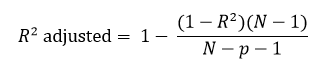

Essa versão da R squared, é modificada para que:
1. O valor sempre dê menor que o R squared.
2. O valor resultante só irá aumentar, quando o novo preditor realmente melhora o modelo.
3. Se o novo preditor não melhora o modelo, esse valor irá cair. 

Um exemplo seria esse caso, que a partir de um certo ponto, a quantidade de preditores diminui o R squared ajustado:

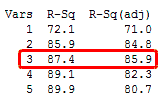

Abaixo quando adicionamos um novo preditor, notamos que apesar do R squared ter subido, o ajustado diminuiu.



In [13]:
lreg.score(CV,validation_data.Item_Outlet_Sales), 1 - (((1 - lreg.score(CV,validation_data.Item_Outlet_Sales)**2)*(CV.shape[0] - 1))/(CV.shape[0] - 2 - 1))

(0.3132332556956239, 0.09738568717038343)

Isso significa que X foi responsável por 33% da variância em Y.

In [14]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
validation_data['Item_Weight'] = validation_data['Item_Weight'].fillna(validation_data['Item_Weight'].mean())
x_train = train_data.loc[:, ['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
y_train = train_data.Item_Outlet_Sales
x_cv = validation_data.loc[:, ['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
y_cv = validation_data.Item_Outlet_Sales

lreg = LinearRegression()
lreg.fit(x_train,y_train)
predicted = lreg.predict(x_cv)
mean_squared_error(predicted, y_cv) ** (.5)

1427.9863769041908

In [15]:
lreg.score(x_cv,y_cv), 1 - (((1 - lreg.score(x_cv,y_cv)**2)*(y_cv.shape[0] - 1))/(y_cv.shape[0] - 3 - 1))

(0.3132387602818225, 0.09702400458481408)

Melhorou quase nada.

In [16]:
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-8.642378
1,Item_MRP,15.593480
2,Item_Weight,-1.342776


### Verificando os tipos de cada coluna.

In [17]:
[(col,train_data[col].dtype) for col in train_data.columns]

[('Item_Identifier', dtype('O')),
 ('Item_Weight', dtype('float64')),
 ('Item_Fat_Content', dtype('O')),
 ('Item_Visibility', dtype('float64')),
 ('Item_Type', dtype('O')),
 ('Item_MRP', dtype('float64')),
 ('Outlet_Identifier', dtype('O')),
 ('Outlet_Establishment_Year', dtype('int64')),
 ('Outlet_Size', dtype('O')),
 ('Outlet_Location_Type', dtype('O')),
 ('Outlet_Type', dtype('O')),
 ('Item_Outlet_Sales', dtype('float64'))]

### Realizando inputing

É preciso tratar os dados para que possamos usarmos no treinamento.
Para isso, dividimos os dados categóricos dos dados numéricos. 

Usamos one-hot-encoding para os dados categoricos.
Para os dados numéricos usamos a média para preencher os vazios. 
Para os dados categóricos podemos usar a categoria que mais aparece por exemplo, nesse caso usei uma arbitrária.

In [18]:
data.drop(['Item_Identifier'], axis = 1, inplace= True)

In [19]:
data['Outlet_Size'].fillna('Small',inplace=True)
objectColumns = data.select_dtypes(include = ["object"]).columns
dummies = pd.get_dummies(data[objectColumns], prefix = objectColumns)
data.drop(objectColumns,axis=1, inplace=True)
data = pd.concat([data,dummies], axis = 1)

In [20]:
train_data = data.iloc[mask]
validation_data = data.iloc[reverse_mask]

In [21]:
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0,train_data['Item_Visibility'].mean())
validation_data['Item_Visibility'] = validation_data['Item_Visibility'].replace(0,validation_data['Item_Visibility'].mean())

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
validation_data['Item_Weight'] = validation_data['Item_Weight'].fillna(validation_data['Item_Weight'].mean())

#2013 é possivelmente a data mínima. fazendo isso transformamos em categorias de 0 até N.
train_data['Outlet_Establishment_Year'] = 2013 - train_data['Outlet_Establishment_Year']
validation_data['Outlet_Establishment_Year'] = 2013 - validation_data['Outlet_Establishment_Year']

In [22]:
columns = list(train_data.columns)
columns.remove("Item_Outlet_Sales")
x_train = train_data[columns]
y_train = train_data["Item_Outlet_Sales"]
x_test = validation_data[columns]
y_test = validation_data["Item_Outlet_Sales"]

lreg = LinearRegression()
lreg.fit(x_train,y_train)
prediction = lreg.predict(x_test)

mean_squared_error(prediction,y_test)**(0.5)

1152.1543836934377

In [23]:
(lreg.score(x_test,y_test), 1 - (((1 - lreg.score(x_test,y_test)**2)*(x_test.shape[0] - 1))/(x_test.shape[0] - 2 - 1)))

(0.5529264254248374, 0.30516615003412595)

### Estratégias para seleção de preditores

Quando temos dados que possuem muitas características, utilizar todas pode mais atrapalhar o algoritmo do que ajudar. Atrapalhar porque, podem haver dados que dependam de outros, ou até mesmo dados que não tem relevância para o modelo.

Nesse caso, devem ser consideradas quais características devem ser usadas no modelo. Para isso temos duas estratégias <strong>Foward selection</strong> e <strong>Backward elimination</strong>. Essas estratégias vão adicionando ou removendo novos preditores e comparando os resultados através da análise resídual ou mesmo através de métricas como o R Square e o Adjusted R Square.



Text(0.5, 1.0, 'Residual Plot')

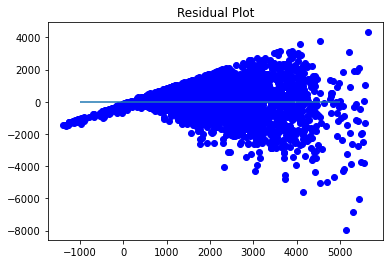

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plot = plt.scatter(prediction, (prediction - y_test), c='b')
plt.hlines(y = 0, xmin = -1000, xmax=5000)
plt.title('Residual Plot')

### Preposições em Regressão Linear

O gráfico residual apresentado acima é de extrema importância para que possamos compreender o que fazer com o modelo para melhorar os resultados. Aqui nesta sessão, vou apresentar não só este, mas outros métodos de analisar o modelo de regressão linear.

As seguintes preposições são propostas quando se trabalha com um modelo de Regressão Linear:

1. Deve haver uma <strong>relação aditiva</strong> entre variáveis dependentes (Y) e as variáveis indepententes (X). Uma relação linear sugere que alguma mudança em relação a Y é responsabilidade de uma mudança em  algum X¹. <strong> A relação aditiva sugere que o efeito de X¹ em Y é independente de outras variáveis </strong>.

2. <strong>Não deve haver correlação entre os termos residuais (erro).</strong> A abstencia desse fenômeno chama-se <strong>auto-correlação</strong>.

3. As <strong>variáveis independentes (X) não devem ser correlacionadas</strong>. A abstência desse fenômeno chama-se <strong>multicolinearidade</strong>. Variáveis que dependem de outras para expressar uma relação linear com Y.

4. Os termos residuais devem ter variância constante. Este fenômeno chama-se <strong>homosedasticidade</strong>. A abstência da homoestacidade gera a <strong>heteroestacidade</strong>.

5. Os termos residuais devem ter distribuição normal.

#### E se houver violação de alguma dessas preposições? 

1. Se os dados não forem aditivos, não serão lineares. O modelo ficará ruim.

<strong>Para checar isso:</strong> verificar o gráfico dos valores originais e dos resíduos (yhat, yhat - y). Termos polinomiais podem ser adicionados para ajudar a ver uma tendência não linear.

2. Autocorrelação - Normalmente ocorre em séries temporais. Onde o instante y depende do y-1. 

<strong>Para checar isso:</strong> verificar DW(Durbin - Watson) Statistic, que basicamente é dada pela fórmula abaixo. O resultado varia entre (0,4), onde 2 indica que não há correlação. Resultados menores que 2 indica corelação positiva

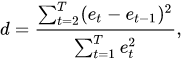

3. Multilinearidade - Torna difícil de encontrar (descobrir) qual variável está realmente impactando na resposta predita.

<strong>Para checar isso:</strong> Deve ser calculado o coeficiente de inflação de variância. A variância é inflada quando existe multilinearidade. Assim, basta calcular:

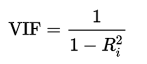

Nesse caso, valores <= 4 são considerados sem multilinearidade. Acima disso, é indício de multilinearidade.

4. Heteroestacidade - Implica a presença de forte outlayers que ganharam bastante peso. 

<strong>Para checar isso:</strong>
basta olhar se existe formato de fúnil no gráfico Y vs (Y - Yhat). Também é possível fazendo o teste de Weisberg ou teste geral branco.

5. Distribuição normal dos erros.

<strong>Para checar isso:</strong> basta olhar o gráfico QQ.

O gráfico a seguir mostra exemplos de dados que não tem um comportamento linear, isto é, uma relação aditiva.

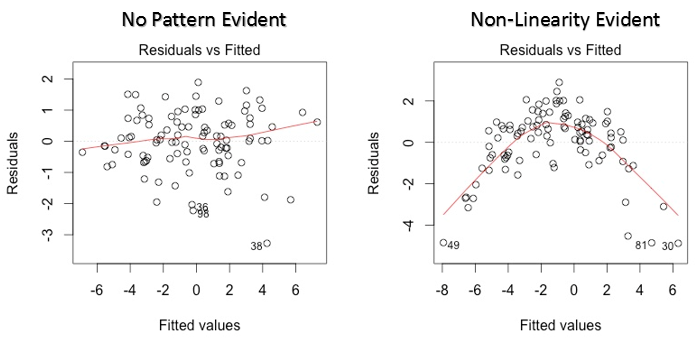

<strong>Como resolver:</strong> Para lidar com problemas de não-linearidade, é possível fazer transformações lineares nos preditores (Log(x), sqrt(x), x^2).

A seguir, um exemplo de heteroestacidade

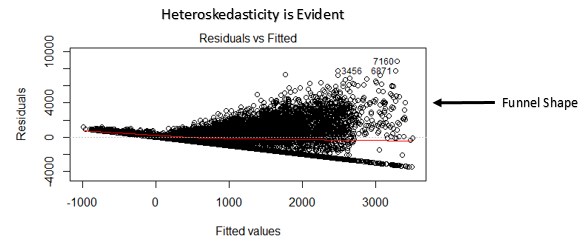

Esse outro exemplo, mostra heteroestacidade com o gráfico residual normalizado.
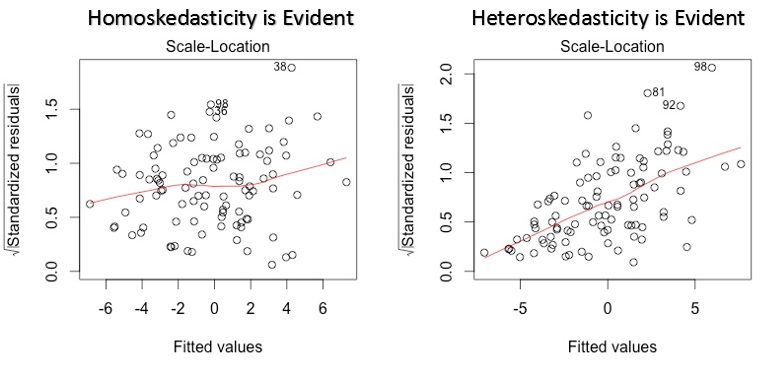

<strong>Como resolver:</strong> Para lidar com heteroelasticidade, é possível trabalhar com transformações em cima de Y (Log(Y) e sqrt(Y)). Também é possível utilizar o método de quadrados mínimos ponderados. 

No caso dos erros resíduais não possuírem distribuição normal, teremos o seguinte comportamento:

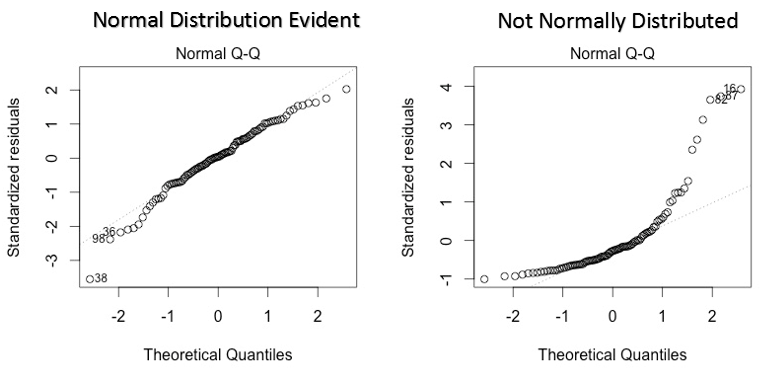

No momento, use bibliotecas para gerar o QQ plot. Não estudei estatística suficiente para conseguir entender. Ainda vou ver.
Mas em suma, teremos uma reta no caso de distribuição normal.

<strong>Como resolver:</strong> transformações não lineares nos preditores ou na resposta (Y).

Um outro gráfico bastante útil é chamado de Cook Distance Plot, este gráfico tenta identificar os pontos mais influentes dos dados. Estes pontos tem grande impacto na regressão linear. Adicionar ou remove-los pode alterar significantemente o desempenho do modelo.

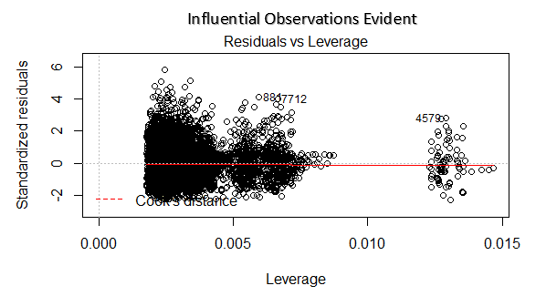

In [25]:
#DW Statistic
sum([((prediction - y_test)**2).iloc[index] - ((prediction - y_test)**2).iloc[index-1] for index in range(1,((prediction - y_test)**2).shape[0])])/ ((prediction - y_test)**2).sum()

0.0001424567155282735

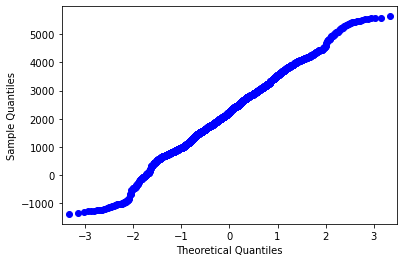

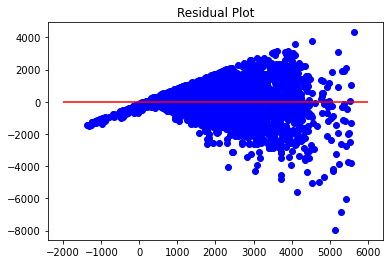

2.23676830139259

In [26]:
import statsmodels.api as sm

sm.qqplot(prediction)
plt.show()

plot = plt.scatter(prediction, (prediction - y_test), c='b')
plt.hlines(y = 0, xmin = -2000, xmax=6000, color='r')
plt.title('Residual Plot')
plt.show()

1/(1-(lreg.score(x_test,y_test)))

### No nosso modelo...

Observa-se que de forma geral, o erro segue uma distribuição normal. Todavia, temos o caso de heteroestaticidade. A questão é: "Quais dos atributos são responsáveis pela heteroestacidade ?"

Trabalhar com dados categoricos nesse momento, deve ser considerado em ultimo caso, já que por serem discretos não vão possuir um impacto tão grande quando os dados numéricos.

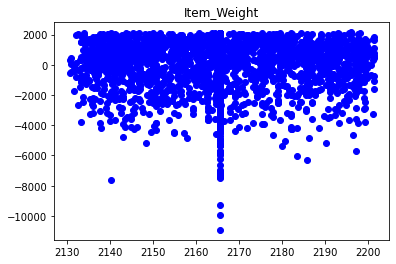

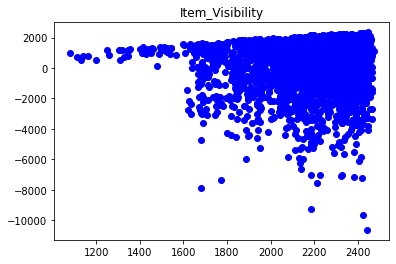

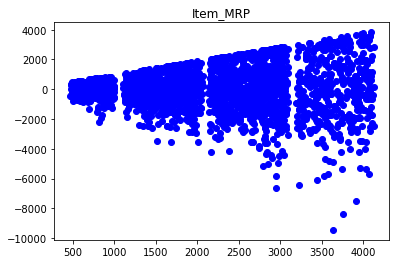

In [27]:
import numpy as np

columns = x_train.select_dtypes(['float64']).columns
for col in columns:
    lreg = LinearRegression()
    lreg.fit(np.array(x_train[col]).reshape(-1,1), y_train)
    prediction = lreg.predict(np.array(x_test[col]).reshape(-1,1))
    plot = plt.scatter(prediction, (prediction - y_test), c='b')
    plt.title(col)
    plt.show()

In [28]:
lreg = LinearRegression()
lreg.fit(x_train, np.log(y_train))
prediction = lreg.predict(x_test)
mean_squared_error(np.e**prediction, y_test) ** .5

1151.7167468329342

In [29]:
(lreg.score(x_test,np.log(y_test)), 1 - (((1 - lreg.score(x_test,np.log(y_test))**2)*(x_test.shape[0] - 1))/(x_test.shape[0] - 2 - 1)))

(0.7031090919452736, 0.4939534686861565)

Apesar de não ter havido melhora na diminuição do erro, os dados estão sendo muito mais bem explicados pelos preditores

In [30]:
np.e**prediction[:10]

array([ 729.88874966,  836.44432336, 1525.42151119, 4410.79217738,
       2111.30208394, 1973.300116  , 1356.9613009 , 2008.45083596,
       1963.99291326, 5194.63334091])

In [31]:
y_test[:10]

5      556.6088
10    1516.0266
13    2145.2076
20    3775.0860
24    4078.0250
35    3791.0652
37    1609.9044
39    2180.4950
46    2428.8384
47    5815.0972
Name: Item_Outlet_Sales, dtype: float64

In [32]:
np.e

2.718281828459045